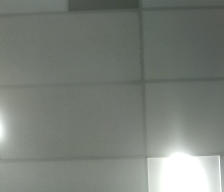

In [ ]:
from picamera.array import PiRGBArray
import picamera
import time
import IPython.display
import PIL.Image
import cv2

# eye_detector = cv2.CascadeClassifier('haarcascade_eye.xml')
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

face_id = 1
count = 0

with picamera.PiCamera() as camera:
    camera.resolution = (224, 192)
    rawCapture = PiRGBArray(camera)
    
    for frame in camera.capture_continuous(rawCapture, format="bgr", use_video_port=True):
        image = frame.array  #grab the raw NumPy array representing the image
        rawCapture.truncate(0) # clear the stream in preparation for the next frame
        
        # This image can now be used with openCV...
        image = cv2.flip(image, 0)
        
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = face_detector.detectMultiScale(
            gray,
            scaleFactor = 1.1,
            minNeighbors=5,
            minSize=(30, 30),
        )
        
        for (x, y, w, h) in faces:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        IPython.display.display(PIL.Image.fromarray(image))
        IPython.display.clear_output(wait=True) 
